# 1. Standard Rgeression mit OHE für die Einnahmen eines Fahrradverleihs

In [3]:
import pandas as pd

#### 1.1 Daten laden

In [4]:
df = pd.read_csv('trip_weather_hourly.csv')
df

,start_date,number_trips,duration,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29 09:00:00,12,1022.500000,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-29 10:00:00,14,1677.857143,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2,2013-08-29 11:00:00,42,2203.809524,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
3,2013-08-29 12:00:00,120,934.833333,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
4,2013-08-29 13:00:00,87,3934.103448,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17578,2015-08-31 19:00:00,72,496.652778,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107
17579,2015-08-31 20:00:00,35,544.514286,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107
17580,2015-08-31 21:00:00,13,523.230769,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107
17581,2015-08-31 22:00:00,2,190.500000,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107


Legende:target_value = number_trips
features = all other columns

#### 1.2 Angaben aus dem Datum extrahieren

In [5]:
date_column = df['start_date']
date_column

0        2013-08-29 09:00:00
1        2013-08-29 10:00:00
2        2013-08-29 11:00:00
3        2013-08-29 12:00:00
4        2013-08-29 13:00:00
                ...         
17578    2015-08-31 19:00:00
17579    2015-08-31 20:00:00
17580    2015-08-31 21:00:00
17581    2015-08-31 22:00:00
17582    2015-08-31 23:00:00
Name: start_date, Length: 17583, dtype: object

In [6]:
from datetime import datetime, timedelta
date_colum1 = [datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in date_column]

In [7]:
date_colum1

[datetime.datetime(2013, 8, 29, 9, 0),
 datetime.datetime(2013, 8, 29, 10, 0),
 datetime.datetime(2013, 8, 29, 11, 0),
 datetime.datetime(2013, 8, 29, 12, 0),
 datetime.datetime(2013, 8, 29, 13, 0),
 datetime.datetime(2013, 8, 29, 14, 0),
 datetime.datetime(2013, 8, 29, 15, 0),
 datetime.datetime(2013, 8, 29, 16, 0),
 datetime.datetime(2013, 8, 29, 17, 0),
 datetime.datetime(2013, 8, 29, 18, 0),
 datetime.datetime(2013, 8, 29, 19, 0),
 datetime.datetime(2013, 8, 29, 20, 0),
 datetime.datetime(2013, 8, 29, 21, 0),
 datetime.datetime(2013, 8, 29, 22, 0),
 datetime.datetime(2013, 8, 29, 23, 0),
 datetime.datetime(2013, 8, 30, 0, 0),
 datetime.datetime(2013, 8, 30, 1, 0),
 datetime.datetime(2013, 8, 30, 2, 0),
 datetime.datetime(2013, 8, 30, 3, 0),
 datetime.datetime(2013, 8, 30, 4, 0),
 datetime.datetime(2013, 8, 30, 5, 0),
 datetime.datetime(2013, 8, 30, 6, 0),
 datetime.datetime(2013, 8, 30, 7, 0),
 datetime.datetime(2013, 8, 30, 8, 0),
 datetime.datetime(2013, 8, 30, 9, 0),
 datetime.d

In [8]:
# aus den Zeilen die Datumselemente auslesen
start_date_month = pd.DataFrame([i.month for i in date_colum1], columns = ['month'])
start_date_weekday = pd.DataFrame([i.weekday() for i in date_colum1], columns = ['weekday'])
start_date_hour = pd.DataFrame([i.hour for i in date_colum1], columns = ['hour'])
df_expand = pd.concat([start_date_month, start_date_weekday, start_date_hour, df], axis = 1)
df_expand

,month,weekday,hour,start_date,number_trips,duration,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8,3,9,2013-08-29 09:00:00,12,1022.500000,74.0,68.0,61.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8,3,10,2013-08-29 10:00:00,14,1677.857143,74.0,68.0,61.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2,8,3,11,2013-08-29 11:00:00,42,2203.809524,74.0,68.0,61.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
3,8,3,12,2013-08-29 12:00:00,120,934.833333,74.0,68.0,61.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
4,8,3,13,2013-08-29 13:00:00,87,3934.103448,74.0,68.0,61.0,61.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17578,8,0,19,2015-08-31 19:00:00,72,496.652778,78.0,69.0,60.0,58.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107
17579,8,0,20,2015-08-31 20:00:00,35,544.514286,78.0,69.0,60.0,58.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107
17580,8,0,21,2015-08-31 21:00:00,13,523.230769,78.0,69.0,60.0,58.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107
17581,8,0,22,2015-08-31 22:00:00,2,190.500000,78.0,69.0,60.0,58.0,...,10.0,9.0,18.0,9.0,21.0,0,1.0,NaN,246.0,94107


#### 1.3 Grafische Darstellung der Abhängigkeiten

<AxesSubplot: xlabel='hour', ylabel='number_trips'>

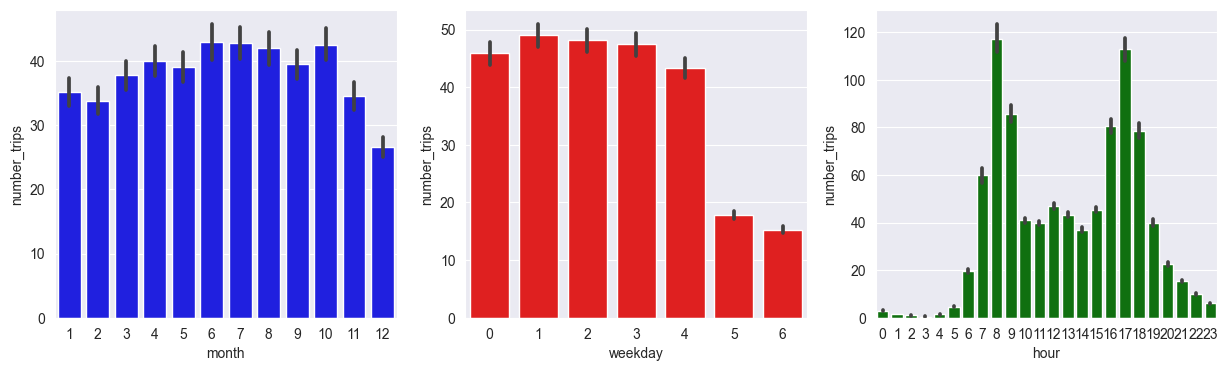

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15,4))
sns.barplot(df_expand, x='month', y='number_trips', color='b',ax = axs[0])
sns.barplot(df_expand, x='weekday', y='number_trips', color='r',ax = axs[1])
sns.barplot(df_expand, x='hour', y='number_trips', color='g',ax = axs[2])

#### 1.4 Einfaches lineares Regressionsmodell
y = d + c1*x1 + c2*x2+ ... cn*xn

In [10]:
from sklearn.model_selection import train_test_split
X = df_expand[['month','weekday','hour']]
y = df_expand['number_trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14066, 3), (3517, 3), (14066,), (3517,))

#### 2. One Hot Encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train)
X_test_ohe = ohe.transform(X_test)

Modell anlernen und evaluieren

In [14]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_ohe, y_train)
r2 = linear_model.score(X_test_ohe, y_test)
print('r2 = '+str(r2))

r2 = 0.6647182863755949
